## **Sum of length of paths from every node to all other nodes using Tree Rerooting technique**

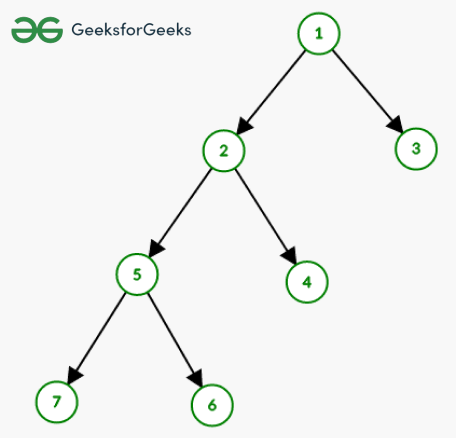

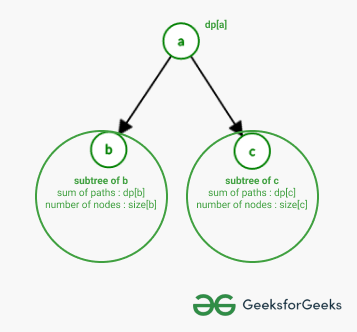

#### Note: dp[node] in figure denotes the sum of paths from node to all its subtrees.

**Now Consider child ‘b’ of node ‘a’**

1. **Size of subtree ‘b’, size[b]** and the **sum of lengths of paths for subtree ‘b’ is given as dp[b].**

2. Consider all the paths which start at ‘a’ and end at some node in subtree of ‘b’.

3. Every path can be broken down as follows: **path(a, x) = edge(a, b) + path(b, x)**

4. As lengths of all paths of form path(b, x) is already covered in dp[b], **only the edge(a, b) needs to be added for all nodes ‘x’ in subtree of ‘b’.**

5. That means size[b] needs to be added to dp[b], hence the contribution of subtree ‘b’ to **dp[a] is (dp[b] + size[b]).**

In [ ]:

class Solution:

    def DFS(self,node,par,G):

        self.size[node] = 1
        self.dp[node] = 0

        for v in G[node] :

            if v!=par : 

                self.DFS(v,node,G)
                self.size[node] += self.size[v]
                self.dp[node] += self.dp[v] + self.size[v]

    def pathSum(self,n,G):

        self.size = [0]*n  # for storing size of subtree
        self.dp = [0]*n    # for storing sum of paths

        self.ans = [0]*n

        for r in range(0, n):
            self.DFS(r, -1, G)
            self.ans[r] = self.dp[r]

        return self.ans

    

## **Rerooting**

In [ ]:

class Solution:

    def DFS(self,node,par,G):

        self.size[node] = 1
        self.dp[node] = 0

        for v in G[node] :

            if v!=par : 

                self.DFS(v,node,G)
                self.size[node] += self.size[v]
                self.dp[node] += self.dp[v] + self.size[v]

    def Rerooting(self,node,par,n,G):

        for child in G[node]:

            if child != par :

                self.dp[child] = self.dp[node] - self.size[child] + (n-self.size[child])

                self.Rerooting(child,node,n,G)

    def pathSum(self,n,G):

        self.size = [0]*n  # for storing size of subtree
        self.dp = [0]*n    # for storing sum of paths

        
        self.DFS(0, -1, G)
        self.Rerooting(0,-1,n,G)

        return self.dp

    